<a href="https://colab.research.google.com/github/tejb96/ml-clustering/blob/main/a5_ensf611_Tejpreet_Bal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Tejpreet Bal

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [ ]:
# TODO: Import dataset and inspect the first five columns
df=pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [ ]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("X:", X.shape, " y:",y.shape)


X: (210, 7)  y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

*ANSWER HERE*

StandardScaler can be used if the data does not contain outliers, since I have not yet checked for them, it would be best to just use the RobustScaler.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [ ]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=5)

In [ ]:
# TODO: Print the shape of the training feature matrix and target vector
print("X:", X_train.shape, " y:",y_train.shape)

X: (157, 7)  y: (157,)


Now that we have our training data, we can implement our selected scaler.

In [ ]:
# TODO: Scale the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [ ]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [ ]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters: ", grid_search.best_params_)

best_C = grid_search.best_params_['C']
best_fit_intercept = grid_search.best_params_['fit_intercept']

best_logreg = LogisticRegression(C=best_C, fit_intercept=best_fit_intercept)
best_logreg.fit(X_train_scaled, y_train)

validation_score = best_logreg.score(X_val_scaled, y_val)
cross_val_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5)
print("cross-validation score:", cross_val_scores.mean())

print("test Score:", validation_score)


Best Parameters:  {'C': 10.0, 'fit_intercept': True}
cross-validation score: 0.9296370967741936
test Score: 0.9622641509433962


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [ ]:
# TODO: Predict y labels using best estimator
y_test_pred = best_logreg.predict(X_val_scaled)

In [ ]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_test_pca = pca.transform(X_val_scaled)

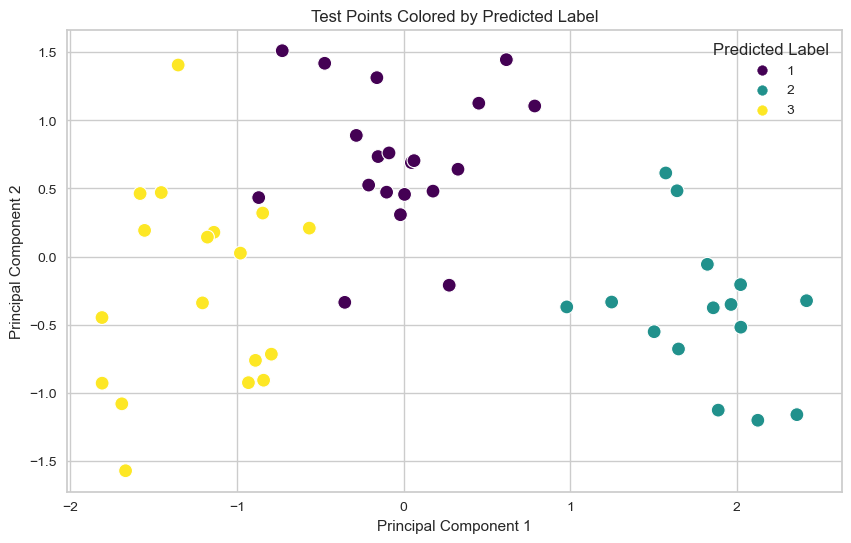

In [ ]:
# TODO: Plot test points colored by predicted label

# result_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(1, pca.components_.shape[1] + 1)])
# result_df['Predicted_Label'] = y_test_pred

result_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
result_df['Predicted_Label'] = y_test_pred

# Plot test points colored by predicted label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Label', data=result_df, palette='viridis', s=100)
plt.title('Test Points Colored by Predicted Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Label', loc='upper right')
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. The logistic regression model performed well on this dataset with a cross validation score of 0.93 and a test score of 0.96.
2. THe PCA seems to have worked well with this data, because it shows that the principal components are separable.
It shows that the model is predicting based on the relevant features in the dataset selected by the pca.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I mostly used the code provided in the examples on D2L, and the labs on Gooogle Colab.
2. I completed the steps in order.
3. I asked AI about fitting the pca, I was initially fitting it to the x_val_scaled which it told me could lead to data leakage so I changed that.
4. It was not too challenging, because I was able to refer to the lecture code files and the labs.


## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [ ]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler

df_scaled = X.copy()

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

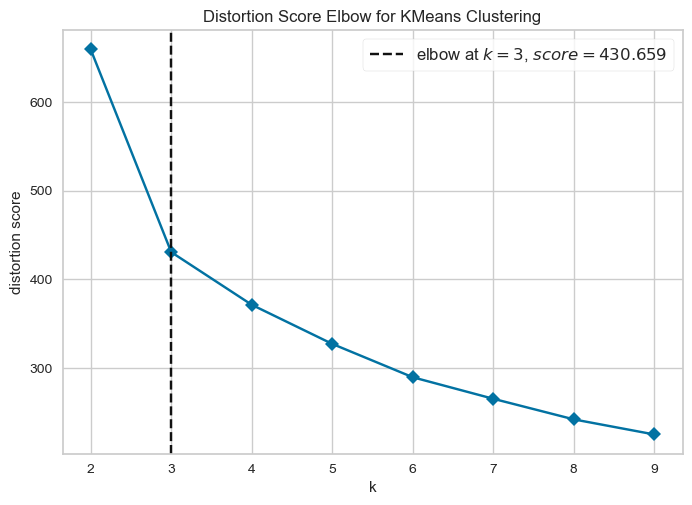

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=5), k=(2, 10),
                 timings=False)

In [ ]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=5), df_scaled, k=(2,10),
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [ ]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(df_scaled)

c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [ ]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calinski-Harabasz Score
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

Silhouette Score: 0.4007
Calinski-Harabasz Score: 249.7842
Davies-Bouldin Score: 0.9279


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

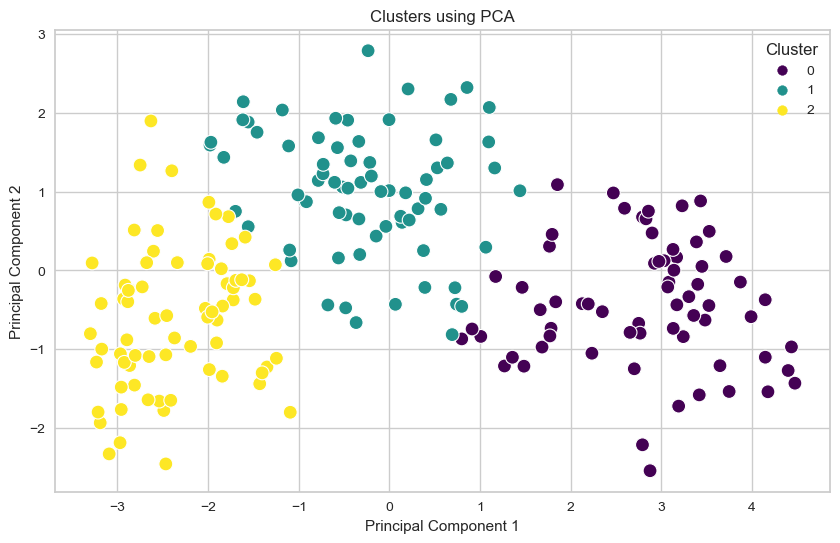

In [ ]:
# TODO: Plot clustering results
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = kmeans.labels_

# Plot the clustering results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [ ]:
# TODO: Find the number of principal components using explained variance ratio
principal_components = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(principal_components >= 0.95) + 1

print(principal_components, "\ncomponents req:",n_components_95)

[0.71874303 0.88982486] 
components req: 1


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components_95)
pca_result = pca.fit_transform(df_scaled)

In [ ]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(pca_result)

c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tejpr\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [ ]:
# TODO: Calculate the three different validation metrics
silhouette = silhouette_score(pca_result, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(pca_result, kmeans.labels_)
davies_bouldin = davies_bouldin_score(pca_result, kmeans.labels_)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results
results_df = pd.DataFrame({
    'Validation Metric': ['Number of Components (95% Variance)', 'Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Value': [n_components_95, silhouette, calinski_harabasz, davies_bouldin]
})

print(results_df)

                     Validation Metric        Value
0  Number of Components (95% Variance)     1.000000
1                     Silhouette Score     0.632392
2              Calinski-Harabasz Score  1024.501473
3                 Davies-Bouldin Score     0.464125


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. Yes, it makes sense since the seeds belong to three different varities of wheat and the optimal number of clusters were determined to be 3 using the elbow method.
2. The results are similar in both parts, there are 3 clusters which are easy to differentiate.
3. The number of components retaining 95% variance is 1, so 1 component was used.
The results did seem to improve, Silhouette score increased to 0.63 from 0.40, Calinski-Harabasz Score increased to 1024.5 from 249.78, and Davies-Bouldin Score decreased to 0.46 from 0.9. The improvement in the results could be due to the reduction in dimenions, while retaining essential information.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I mostly used the the labs and the example lecture codes.
2. Steps were completed in order, but revisited some steps to make small changes.
3. I asked about the warnings when using the elbow method and it said that is common.
4. This part was a bit challeneging because it was a bit difficult to find what I was looking for in the labs and the lecture codes.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that parts 1 and 2 were related. I found it interesting that for part 2, when I used the optimal number of principal components it gave me better results while having less dimensions.